**Installing TextAugment Framework**

In [ ]:
!pip install textaugment

**Importing Frameworks**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

import re
import random
from os import path
from PIL import Image

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from wordcloud import WordCloud , ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0 : The tweet is not racist/sexist  
1 : The tweet is racist/sexist  
Actual usernames are removed by @user

In [ ]:
train = pd.read_csv('train.csv')
train = train.iloc[:,1:]  # Drop id column
train.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(["user"])
def standard(input_data):
    stripped = re.sub('[^a-zA-Z]',' ',input_data)
    word_tokens = word_tokenize(stripped)
    filtered_sentence = [word for word in word_tokens if not word in stop_words]
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    return " ".join(filtered_sentence)

In [ ]:
negative = train[train["label"] == 1]
negative

,label,tweet
13,1,@user #cnn calls #michigan middle school 'buil...
14,1,no comment! in #australia #opkillingbay #se...
17,1,retweet if you agree!
23,1,@user @user lumpy says i am a . prove it lumpy.
34,1,it's unbelievable that in the 21st century we'...
...,...,...
31934,1,lady banned from kentucky mall. @user #jcpenn...
31946,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,1,@user @user you don't have the balls to hashta...
31948,1,"makes you ask yourself, who am i? then am i a..."


In [ ]:
augTweets = negative.tweet.apply(standard)
augTweets = augTweets.to_frame()
augTweets

,tweet
13,cnn calls michigan middle school build wall ch...
14,comment australia opkillingbay seashepherd hel...
17,retweet agree retweet agree
23,lumpy says prove lumpy lumpy says prove lumpy
34,unbelievable st century need something like ne...
...,...
31934,lady banned kentucky mall jcpenny kentucky lad...
31946,omfg offended mailbox proud mailboxpride liber...
31947,balls hashtag say weasel away lumpy tony dipsh...
31948,makes ask anybody god oh thank god makes ask a...


In [ ]:
from textaugment import Wordnet,EDA,Translate
wn = Wordnet()
wn1 = Wordnet(v=False ,n=True, p=0.5)
t = EDA()
def augmentData(dataFrame):
  df = pd.DataFrame(columns=["tweet"]);
  for index, row in dataFrame.iterrows():
    data = row['tweet']
    try:
      df = df.append({'tweet':data},ignore_index=True)
      df = df.append({'tweet':wn.augment(data)},ignore_index=True)
      df = df.append({'tweet':wn1.augment(data)},ignore_index=True)
      df = df.append({'tweet':t.synonym_replacement(data)},ignore_index=True)
      df = df.append({'tweet':t.random_deletion(data)},ignore_index=True)
      df = df.append({'tweet':t.random_swap(data)},ignore_index=True)
      df = df.append({'tweet':t.random_insertion(data)},ignore_index=True)
    except:
      pass
  return df

In [ ]:
augmentedNegativeTweets = augmentData(augTweets)

In [ ]:
augmentedNegativeTweets = augmentedNegativeTweets.drop_duplicates()
augmentedNegativeTweets = pd.DataFrame(augmentedNegativeTweets)
augmentedNegativeTweets["label"] = 1
augmentedNegativeTweets.columns=["tweet","label"]
augmentedNegativeTweets

,tweet,label
0,cnn calls michigan middle school build wall ch...,1
1,cnn call michigan middle school make wall chan...,1
2,cnn calls michigan middle school build paries ...,1
3,cnn calls michigan mediate school build wall c...,1
4,michigan middle school wall chant tcot cnn cal...,1
...,...,...
15667,hold ask anybody god oh thank god hold ask any...,1
15669,makes ask oh god anybody thank god makes ask a...,1
15670,makes ask anybody god oh arrive at thank god m...,1
15675,temple vandalised calgary condemns act sikh te...,1


In [ ]:
np.random.seed(10)

minimizedPositiveTweets = train.copy()
minimizedPositiveTweets = minimizedPositiveTweets[minimizedPositiveTweets['label'] == 0]

indexNames = minimizedPositiveTweets.index

remove_n = minimizedPositiveTweets.shape[0] - augmentedNegativeTweets.shape[0]

drop_indices = np.random.choice(indexNames, remove_n, replace=False)
minimizedPositiveTweets.drop(drop_indices,inplace=True)
minimizedPositiveTweets

,label,tweet
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
4,0,factsguide: society now #motivation
6,0,@user camping tomorrow @user @user @user @use...
8,0,we won!!! love the land!!! #allin #cavs #champ...
...,...,...
31937,0,love island ð
31938,0,my fav actor #vijaysethupathi ! my fav actress...
31942,0,this week is flying by #humpday - #wednesday...
31944,0,you're surrounded by people who love you (even...


In [ ]:
minimizedPositiveTweets.tweet = minimizedPositiveTweets.tweet.apply(standard)
minimizedPositiveTweets

,label,tweet
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty bihday majesty
4,0,factsguide society motivation factsguide socie...
6,0,camping tomorrow danny camping tomorrow danny
8,0,love land allin cavs champions cleveland cleve...
...,...,...
31937,0,love island love island
31938,0,fav actor vijaysethupathi fav actress fav dire...
31942,0,week flying humpday wednesday kamp ucsd week f...
31944,0,surrounded people love even deserve yet hatefu...


In [ ]:
augmentDFTrain = pd.concat([minimizedPositiveTweets,augmentedNegativeTweets])
augmentDFTrain = augmentDFTrain.sample(frac=1).reset_index(drop=True)
augmentDFTrain # New Train Dataset

,label,tweet
0,1,carl paladino says obama live gorilla resignat...
1,1,allahsoil distos threat islamic extremism emir...
2,0,conjuring pa theconjuring horor movie xx jakaa...
3,0,afternoon snack vegan oatcakes strawbs healthy...
4,0,thankful hugs thankful positive thankful hugs ...
...,...,...
25323,1,call us homophobic misogynist really saying je...
25324,0,needlefelted taylor cervivintage via etsy tail...
25325,0,yep waiting watch orangeisthenewblack done day...
25326,0,euphorix today bottles stock get euphorix limi...


In [ ]:
augmentDFTrain = augmentDFTrain.replace([np.inf, -np.inf, -0], 0) # Reshape

augX = augmentDFTrain["tweet"]
augY = augmentDFTrain["label"]

In [ ]:
augmentDFTrain

,label,tweet
0,0,happy father day fathersday fathersday father ...
1,1,message hate god loves people hatred color hat...
2,1,error pa agree special performer thrown someth...
3,0,lokiday dears friends lokiday dears friends
4,0,need step away twitter need step away twitter
...,...,...
25249,1,united states of america great without asshole...
25250,0,get involved volunteering get involved volunte...
25251,0,heroes time heroesdayug heroes time heroesdayug
25252,0,eyes though love freespirit hippie hippy peace...


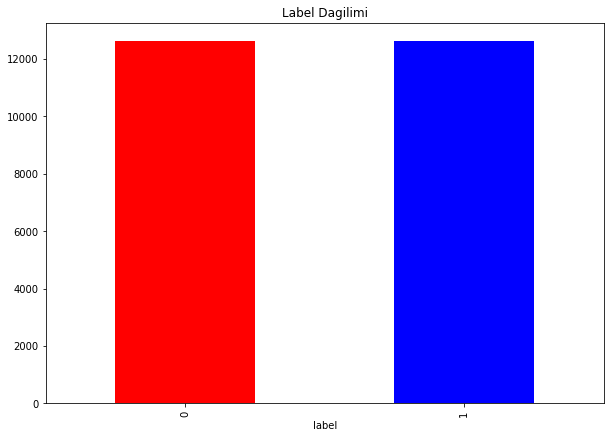

In [ ]:
labels = augmentDFTrain.groupby("label").size()
labels.plot(kind="bar",title="Label Dagilimi",legend=False,color = list('rb'),figsize=[10,7])
plt.show()

In [ ]:
text = " ".join(tweet for tweet in augmentDFTrain["tweet"])
print ("There are {} words in the combination of all tweet.".format(len(text.split(" "))))

There are 408150 words in the combination of all tweet.


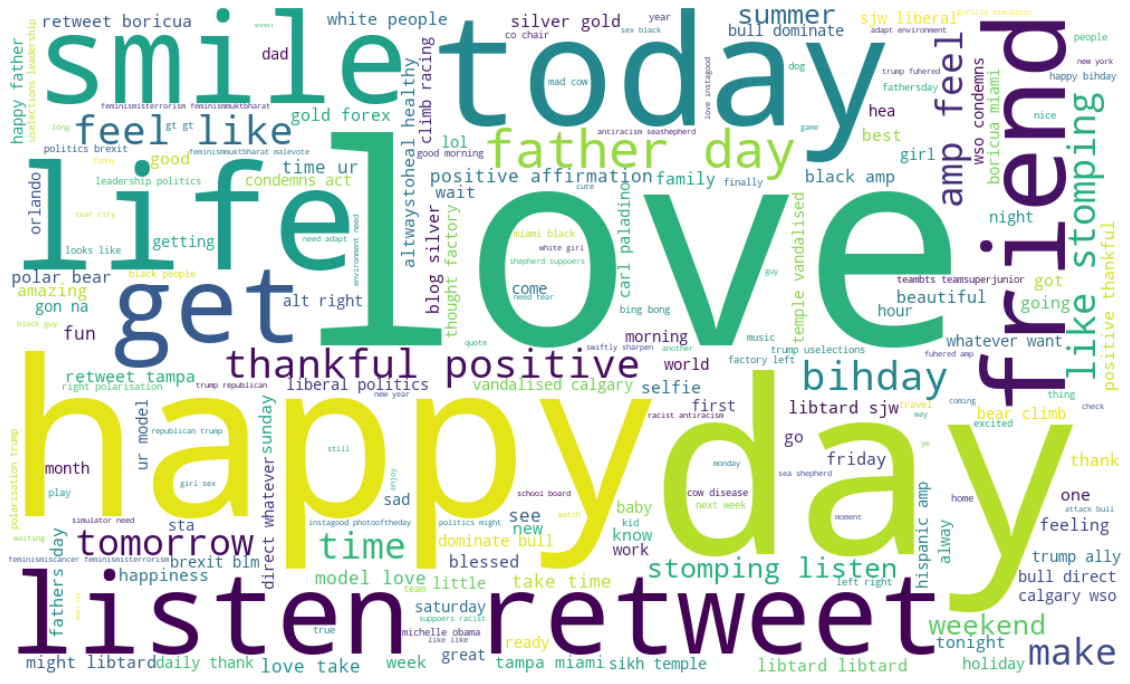

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white",width=1000,height=600).generate(text)

#wordcloud.to_file("wcp2.png")
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [ ]:
augTrainDeneme  = tf.data.Dataset.from_tensor_slices((augX.values,augY.values))

In [ ]:
aug_train_text = augTrainDeneme.map(lambda x,y: x)
vectorize_layer.adapt(aug_train_text.batch(64))

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
text_batch = augmentDFTrain.tweet.values[0]
label_batch = augmentDFTrain.label.values[0]
first_review, first_label = text_batch, label_batch
print("Review", first_review)
print("Label", label_batch)
print("Vectorized review", vectorize_text(first_review, first_label))

Review carl paladino says obama live gorilla resignation stop carl paladino says michelle obama live gorilla resign resignation stop
Label 1
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[ 283,  158,  110,   23,   73,  371,  939,   60,  283,  158,  110,
         423,   23,   73,  371, 1114,  939,   60,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   

In [ ]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[2180])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[36])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  slander
 313 --->  great
Vocabulary size: 10000


In [ ]:
aug_train_son = augTrainDeneme.map(vectorize_text)

In [ ]:
aug_train_ds_size = int(0.64 * augmentDFTrain.shape[0])
aug_valid_ds_size = int(0.16 * augmentDFTrain.shape[0])

aug_train_ds = aug_train_son.take(aug_train_ds_size)
aug_remaining = aug_train_son.skip(aug_train_ds_size)  
aug_valid_ds = aug_remaining.take(aug_valid_ds_size)
aug_test_ds = aug_remaining.skip(aug_valid_ds_size)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

aug_train_ds = aug_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
aug_valid_ds = aug_valid_ds.cache().prefetch(buffer_size=AUTOTUNE)
aug_test_ds = aug_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
embedding_dim = 16

### First Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features+1,embedding_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
aug_train_ds = aug_train_ds.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
aug_valid_ds = aug_valid_ds.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
aug_test_ds = aug_test_ds.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))

In [ ]:
epochs = 5
history = model.fit(
    aug_train_ds,
    validation_data=aug_valid_ds,
    epochs=epochs)

Epoch 1/5
16225/16225 [==============================] - 67s 4ms/step - loss: 0.4771 - binary_accuracy: 0.7959 - val_loss: 0.2887 - val_binary_accuracy: 0.8708
Epoch 2/5
16225/16225 [==============================] - 62s 4ms/step - loss: 0.2238 - binary_accuracy: 0.9099 - val_loss: 0.2003 - val_binary_accuracy: 0.9172
Epoch 3/5
16225/16225 [==============================] - 64s 4ms/step - loss: 0.1582 - binary_accuracy: 0.9373 - val_loss: 0.1655 - val_binary_accuracy: 0.9361
Epoch 4/5
16225/16225 [==============================] - 64s 4ms/step - loss: 0.1246 - binary_accuracy: 0.9508 - val_loss: 0.1464 - val_binary_accuracy: 0.9433
Epoch 5/5
16225/16225 [==============================] - 63s 4ms/step - loss: 0.1041 - binary_accuracy: 0.9600 - val_loss: 0.1359 - val_binary_accuracy: 0.9492


In [ ]:
model.evaluate(aug_test_ds)

5071/5071 [==============================] - 8s 1ms/step - loss: 0.1384 - binary_accuracy: 0.9430


[0.13839127123355865, 0.9430092573165894]

### Second Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features+1,embedding_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1,activation="relu"),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.25))

In [ ]:
epochs = 5
history = model.fit(
    aug_train_ds,
    validation_data=aug_valid_ds,
    epochs=epochs)

Epoch 1/5
16162/16162 [==============================] - 64s 4ms/step - loss: 0.1517 - binary_accuracy: 0.9519 - val_loss: 0.2053 - val_binary_accuracy: 0.9465
Epoch 2/5
16162/16162 [==============================] - 60s 4ms/step - loss: 0.1483 - binary_accuracy: 0.9598 - val_loss: 0.2177 - val_binary_accuracy: 0.9458
Epoch 3/5
16162/16162 [==============================] - 65s 4ms/step - loss: 0.1572 - binary_accuracy: 0.9603 - val_loss: 0.2191 - val_binary_accuracy: 0.9537
Epoch 4/5
16162/16162 [==============================] - 65s 4ms/step - loss: 0.1387 - binary_accuracy: 0.9670 - val_loss: 0.2275 - val_binary_accuracy: 0.9540
Epoch 5/5
16162/16162 [==============================] - 65s 4ms/step - loss: 0.1592 - binary_accuracy: 0.9682 - val_loss: 0.2086 - val_binary_accuracy: 0.9502


In [ ]:
model.evaluate(aug_test_ds)

5052/5052 [==============================] - 5s 1ms/step - loss: 0.2286 - binary_accuracy: 0.9519


[0.2286294549703598, 0.9519002437591553]